<a href="https://colab.research.google.com/github/Lufl3005/Business-Analytics/blob/main/Reto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy==3.7.6
!spacy download es_core_news_lg
!spacy download en_core_web_sm
!pip install wordcloud

Reason for being yanked: Incorrect compatibility for transformer models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart 

In [ ]:
import spacy
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nxl=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/ContextoEconomicoColombia_2024_2.txt").read()
nxl2=open("/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/ContextoEconomicoColombia_2022 (1).txt").read()

nxl_tk=sent_tokenize(nxl)
print(nxl_tk[:5])

nxl_tkw=word_tokenize(nxl)
print(nxl_tkw[:10])

nxl_tk2=sent_tokenize(nxl2)
print(nxl_tk2[:5])

nxl_tkw2=word_tokenize(nxl2)
print(nxl_tkw2[:10])

['Inflation continues to decline, but remains high and far from the 3% target.', 'Inflation is projected to reduce significantly in 2024, in a context in which economic growth would remain low.', 'In 2025, economic growth would increase, as household consumption and business investment become more dynamic.', 'The current monetary policy interest rate is compatible with the convergence of inflation to the 3% target in mid-2025 and with the recovery of economic growth next year.', 'Inflation continues to decline, but remains well above 3%.']
['Inflation', 'continues', 'to', 'decline', ',', 'but', 'remains', 'high', 'and', 'far']
['Este informe, sobre el cual el equipo técnico realiza su recomendación de política monetaria, se publicará el día hábil siguiente a la reunión de la Junta Directiva de los meses de enero, abril, julio y octubre.', 'En el primer trimestre la inflación anual (8,5 %) continuó aumentando y superó de nuevo los pronósticos del promedio del mercado y del equipo técnic

Inflation continues to decline, but remains high and far from the 3% target.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Inflation is projected to reduce significantly in 2024, in a context in which economic growth would remain low.
{'neg': 0.107, 'neu': 0.761, 'pos': 0.132, 'compound': 0.128}
In 2025, economic growth would increase, as household consumption and business investment become more dynamic.
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7778}
The current monetary policy interest rate is compatible with the convergence of inflation to the 3% target in mid-2025 and with the recovery of economic growth next year.
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6808}
Inflation continues to decline, but remains well above 3%.
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.3919}
It is projected to reduce significantly in 2024 and converge to the goal in the first half of 2025.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Price growth in t

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



From the second half of 2024, the economy would accelerate and in 2025 it would reach sustainable levels, compatible with its productive capacity.
{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.0258}
Discharge
Main variables of the macroeconomic forecast
Graphics from the Monetary Policy Report - January 2024
KEEP IN MIND
The analyzes and forecasts included in this report are produced by the Bank's technical team.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
It is the main basis on which the monetary policy recommendation is made to the Board of Directors of the Banco de la República (JDBR) and for these reasons it does not necessarily reflect the opinion of its members.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
AUTHOR OR EDITOR
Technical Management
Deputy Directorate of Monetary Policy and Economic Information
Programming and Inflation Department
Inflation Section
Macroeconomic Programming Section
Forecast Process Management Section
Department of Macroeco

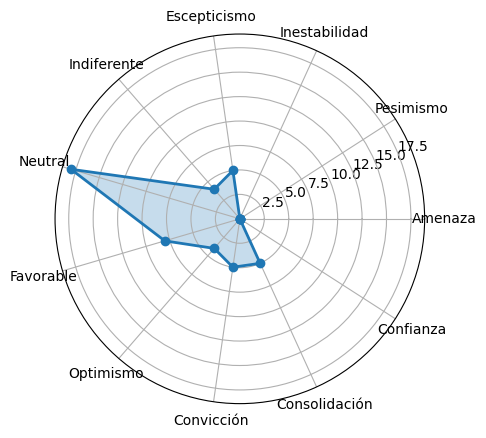

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Traductor de textos
from textblob import TextBlob
import textblob.exceptions

#Librerias de análisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia= SentimentIntensityAnalyzer()

#-------------------------------------------------------------------------------------------
#Análisis de sentimientos para el contexto 2024
XC=np.array([-1,-0.8,-.06,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]

for tokens in nxl_tk:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC[pos]=nXC[pos]+1

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((nXC, [nXC[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)

#Crear informe en un formato Excel
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol)))
dfm.to_excel("AS_ContEco_2024.xlsx")

This report, on which the technical team makes its monetary policy recommendation, will be published on the business day following the meeting of the Board of Directors of January, April, July and October.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
In the first quarter, annual inflation (8.5 %) continued to increase and overcome the forecasts of the market average and the technical team of the bank.
{'neg': 0.051, 'neu': 0.866, 'pos': 0.083, 'compound': 0.2263}
In the run of the year all the large baskets of the Consumer Price Index (CPI) accelerated, and in March their annual variations are above 3 %.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The Food Group (25.4 %) continued to be the one that contributed the most to the increase in inflation, affected, in large part, by deterioration in the external offer and by increasing costs of agricultural inputs.
{'neg': 0.078, 'neu': 0.856, 'pos': 0.066, 'compound': 0.144}
The increase in prices of some public services 

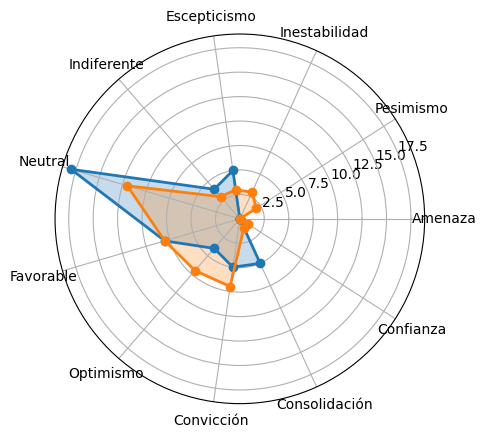

In [ ]:
#Análisis de sentimientos para el contexto 2022
blob=TextBlob(nxl2)
tblob= blob.translate(from_lang="es", to="en")
nxl_tk2=sent_tokenize(str(tblob))

#Se crea el informe
nXC2=np.zeros((11,1))
Xtoks2=[];Xpol2=[]

for tokens2 in nxl_tk2:
  print(tokens2)
  scores=sia.polarity_scores(tokens2)
  print(scores)
  Xtoks2.append(tokens2)
  Xpol2.append(scores["compound"])
  polarity=scores["compound"]

  d=np.abs(XC-polarity)
  pos=np.where(d==np.min(d))
  nXC2[pos]=nXC2[pos]+1

angles=np.linspace(0, 2*np.pi, 11, endpoint=False)
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((nXC, [nXC[0]]))
values2=np.concatenate((nXC2, [nXC2[0]]))
labels=["Amenaza", "Pesimismo", "Inestabilidad","Escepticismo","Indiferente", "Neutral", "Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza" ]

plt.polar(angles, values, 'o-', linewidth=2)
plt.polar(angles, values2, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.fill(angles, values2, alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi, labels)

#Crear informe en un formato Excel
dfm2=pd.DataFrame(np.column_stack((Xtoks2,Xpol2)))
dfm2.to_excel("AS_ContEco_2022.xlsx")

#**Análisis de resultados:**

Para el año 2024 el sentimiento que predominaba era neutral, al igual que en elaño 2022, la diferencia es que para el 2022 el sentimiento fue un poco menor.